<h1> Dhaka air quality </h1>

This project aims to analyse the air quality data for Dhaka city since 2016.

The data is collected from the US Embassy in Dhaka, which records hourly air quality measurements using a monitor on their roof. Their instrument measures the average concentration of fine particle pollutants (PM2.5) in the air over an hour and converts this into an Air Quality Index (AQI) value. AQI is a numerical scale, between 0 and 500, informing how potentially dangerous the air is to health, where small numbers are good and large numbers are bad.

The recognised acceptable standard for AQI is up to 100, once the quality of air degrades to an AQI above 100, sensitive groups of people may experience adverse health effects. AQI values above 150 are considered "unhealthy", meaning everyone begins to be at risk of adverse health issues, the severity of which increases as the AQI gets larger -- with air deemed "very unhealthy" at AQI in excess of 200 and "extremely unhealthy" above 300.

<h2> Pre-processing </h2>

This notebook imports the data from the US Embassy and cleans the dataset, removing poor data measurements and exports the clean dataframe as a csv file to be analysed in the subsequence "analysis and visualisation" notebook.

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
years = '2016, 2017, 2018, 2019, 2020'.split(', ')
datapath = Path('../data/')
df = pd.concat([pd.read_csv(f'{datapath}/Dhaka_PM2.5_{year}_YTD.csv') for year in years])
df = pd.concat([df, pd.read_csv(f'{datapath}/Dhaka_PM2.5_2020_08_MTD.csv')])

In [3]:
# print(f'Number of measurements with AQI < 0 which is impossible unless measurement error: {len(df[df["AQI"]<0])}')
# print(f'Total number of measurements: {len(df)}, so bad data is {round(100*len(df[df["AQI"]<0])/len(df),2)} %' )

In [4]:
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Dhaka,PM2.5 - Principal,2016-01-01 01:00 AM,2016,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,Dhaka,PM2.5 - Principal,2016-01-01 02:00 AM,2016,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,Dhaka,PM2.5 - Principal,2016-01-01 03:00 AM,2016,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,Dhaka,PM2.5 - Principal,2016-01-01 04:00 AM,2016,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,Dhaka,PM2.5 - Principal,2016-01-01 05:00 AM,2016,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


In [5]:
df['Date'] = pd.to_datetime(df['Date (LT)'])
df = df.drop(columns=['Date (LT)'])

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37900 entries, 0 to 71
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Site           37900 non-null  object        
 1   Parameter      37900 non-null  object        
 2   Year           37900 non-null  int64         
 3   Month          37900 non-null  int64         
 4   Day            37900 non-null  int64         
 5   Hour           37900 non-null  int64         
 6   NowCast Conc.  37900 non-null  float64       
 7   AQI            37900 non-null  int64         
 8   AQI Category   36079 non-null  object        
 9   Raw Conc.      37900 non-null  float64       
 10  Conc. Unit     37900 non-null  object        
 11  Duration       37900 non-null  object        
 12  QC Name        37900 non-null  object        
 13  Date           37900 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 16.7 

In [7]:
df.head()

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,Date
0,Dhaka,PM2.5 - Principal,2016,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 01:00:00
1,Dhaka,PM2.5 - Principal,2016,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 02:00:00
2,Dhaka,PM2.5 - Principal,2016,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 03:00:00
3,Dhaka,PM2.5 - Principal,2016,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 04:00:00
4,Dhaka,PM2.5 - Principal,2016,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 05:00:00


<h2> Quality Control</h2>

Fortunately the data comes with a QC tag. Lets check the values:

In [8]:
df['QC Name'].value_counts()

Valid      35873
Missing     1873
Invalid      154
Name: QC Name, dtype: int64

In [9]:
df['QC Name'].value_counts(normalize=True)

Valid      0.946517
Missing    0.049420
Invalid    0.004063
Name: QC Name, dtype: float64

In [10]:
df[df['QC Name']=='Missing'].head()

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,Date
0,Dhaka,PM2.5 - Principal,2016,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 01:00:00
1,Dhaka,PM2.5 - Principal,2016,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 02:00:00
2,Dhaka,PM2.5 - Principal,2016,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 03:00:00
3,Dhaka,PM2.5 - Principal,2016,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 04:00:00
4,Dhaka,PM2.5 - Principal,2016,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 05:00:00


'Missing' data is self explanatory, the concentration values (the direct instrument measurement) are clearly nonsense because of some issue with measurement at the time. 

In [11]:
df[df['QC Name']=='Invalid'].tail(5)

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,Date
4377,Dhaka,PM2.5 - Principal,2020,7,9,14,25.1,78,Moderate,26.0,UG/M3,1 Hr,Invalid,2020-07-09 14:00:00
4378,Dhaka,PM2.5 - Principal,2020,7,9,15,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Invalid,2020-07-09 15:00:00
4379,Dhaka,PM2.5 - Principal,2020,7,9,16,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Invalid,2020-07-09 16:00:00
4380,Dhaka,PM2.5 - Principal,2020,7,9,17,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Invalid,2020-07-09 17:00:00
4497,Dhaka,PM2.5 - Principal,2020,7,15,13,69.9,158,Unhealthy,291.0,UG/M3,1 Hr,Invalid,2020-07-15 13:00:00


The 'Invalid' data is less obvious. Some have nonsensical AQI values, but some have what appear to be sensible concentration and AQI values. But lets trust the datasource's QC tag and omit these. Especially as there are so few of them. 

In [12]:
df_valid = df[df['QC Name']=='Valid']

In [13]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35873 entries, 1441 to 71
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Site           35873 non-null  object        
 1   Parameter      35873 non-null  object        
 2   Year           35873 non-null  int64         
 3   Month          35873 non-null  int64         
 4   Day            35873 non-null  int64         
 5   Hour           35873 non-null  int64         
 6   NowCast Conc.  35873 non-null  float64       
 7   AQI            35873 non-null  int64         
 8   AQI Category   35808 non-null  object        
 9   Raw Conc.      35873 non-null  float64       
 10  Conc. Unit     35873 non-null  object        
 11  Duration       35873 non-null  object        
 12  QC Name        35873 non-null  object        
 13  Date           35873 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 4.

There is still some null values for the AQI Category. Lets inspect:

In [14]:
df_valid[df_valid['AQI Category'].isnull()]

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,Date
1441,Dhaka,PM2.5 - Principal,2016,3,1,2,-999.0,-999,NaN,196.0,UG/M3,1 Hr,Valid,2016-03-01 02:00:00
5865,Dhaka,PM2.5 - Principal,2016,9,1,10,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Valid,2016-09-01 10:00:00
177,Dhaka,PM2.5 - Principal,2017,1,8,10,-999.0,-999,NaN,168.0,UG/M3,1 Hr,Valid,2017-01-08 10:00:00
1385,Dhaka,PM2.5 - Principal,2017,2,27,18,-999.0,-999,NaN,85.0,UG/M3,1 Hr,Valid,2017-02-27 18:00:00
3442,Dhaka,PM2.5 - Principal,2017,5,24,11,-999.0,-999,NaN,44.0,UG/M3,1 Hr,Valid,2017-05-24 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,Dhaka,PM2.5 - Principal,2020,3,21,11,-999.0,-999,NaN,203.0,UG/M3,1 Hr,Valid,2020-03-21 11:00:00
1950,Dhaka,PM2.5 - Principal,2020,3,22,11,-999.0,-999,NaN,68.0,UG/M3,1 Hr,Valid,2020-03-22 11:00:00
3346,Dhaka,PM2.5 - Principal,2020,5,27,15,-999.0,-999,NaN,9.0,UG/M3,1 Hr,Valid,2020-05-27 15:00:00
4381,Dhaka,PM2.5 - Principal,2020,7,9,18,-999.0,-999,NaN,16.0,UG/M3,1 Hr,Valid,2020-07-09 18:00:00


There are clearly some issues with these data, despite being classed as valid in the QC tag. We should omit these values too from our analysis by masking for AQI values less than zero (AQI less than zero is impossible assuming all is well with the data). 

In [15]:
df_valid = df_valid[df_valid['AQI']>0]

In [16]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35808 entries, 1442 to 71
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Site           35808 non-null  object        
 1   Parameter      35808 non-null  object        
 2   Year           35808 non-null  int64         
 3   Month          35808 non-null  int64         
 4   Day            35808 non-null  int64         
 5   Hour           35808 non-null  int64         
 6   NowCast Conc.  35808 non-null  float64       
 7   AQI            35808 non-null  int64         
 8   AQI Category   35808 non-null  object        
 9   Raw Conc.      35808 non-null  float64       
 10  Conc. Unit     35808 non-null  object        
 11  Duration       35808 non-null  object        
 12  QC Name        35808 non-null  object        
 13  Date           35808 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 4.

<h1> EDA </h1>

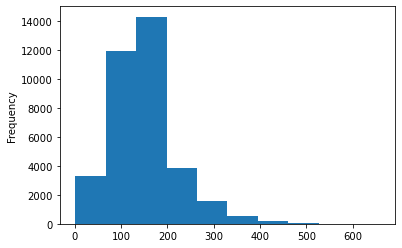

In [17]:
df_valid['AQI'].plot(kind='hist')

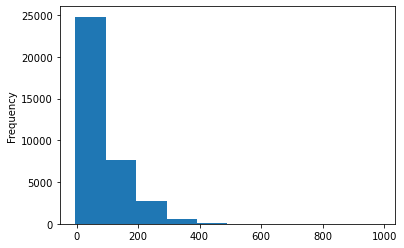

In [18]:
df_valid['Raw Conc.'].plot(kind='hist')

In [19]:
df_valid['AQI Category'].value_counts(normalize=True)

Unhealthy                         0.343582
Moderate                          0.263852
Unhealthy for Sensitive Groups    0.199732
Very Unhealthy                    0.130976
Hazardous                         0.036556
Good                              0.025302
Name: AQI Category, dtype: float64

<h2>Everything appears okay here. Lets move on to the analysis and visualisations of the data: </h2>
[Analysis Notebook](./analysis-visualisation.ipynb)

In [20]:
df_valid.to_csv(f'{datapath}/clean_data.csv')